In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# 사전 학습된 모델 로드
model = VGG16(weights='imagenet')


In [ ]:
# 중간 레이어의 출력을 모델에 포함
layer_outputs = [layer.output for layer in model.layers]
feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

In [11]:
# 이미지 처리
img = tf.keras.preprocessing.image.load_img('/content/cat1.png', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


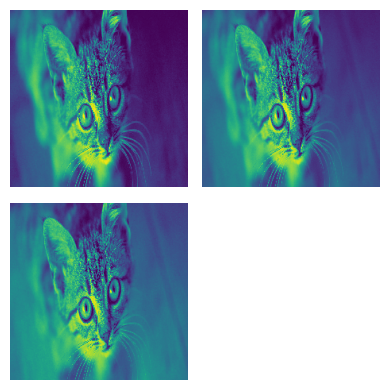

In [13]:
#  feature maps 계산
feature_maps = feature_map_model.predict(img_array)

# 첫 번째 레이어의 특성 맵 시각화
first_layer_feature_map = feature_maps[0]
num_channels = first_layer_feature_map.shape[-1]  #  channels 수 가져오기

# Create a subplot grid that is approximately square
num_cols = int(np.ceil(np.sqrt(num_channels)))
num_rows = int(np.ceil(num_channels / num_cols))

plt.figure(figsize=(num_cols * 2, num_rows * 2))  # Adjust the figure size appropriately

for i in range(num_channels):
    plt.subplot(num_rows, num_cols, i + 1)  # 시각화
    plt.imshow(first_layer_feature_map[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.tight_layout()
plt.show()


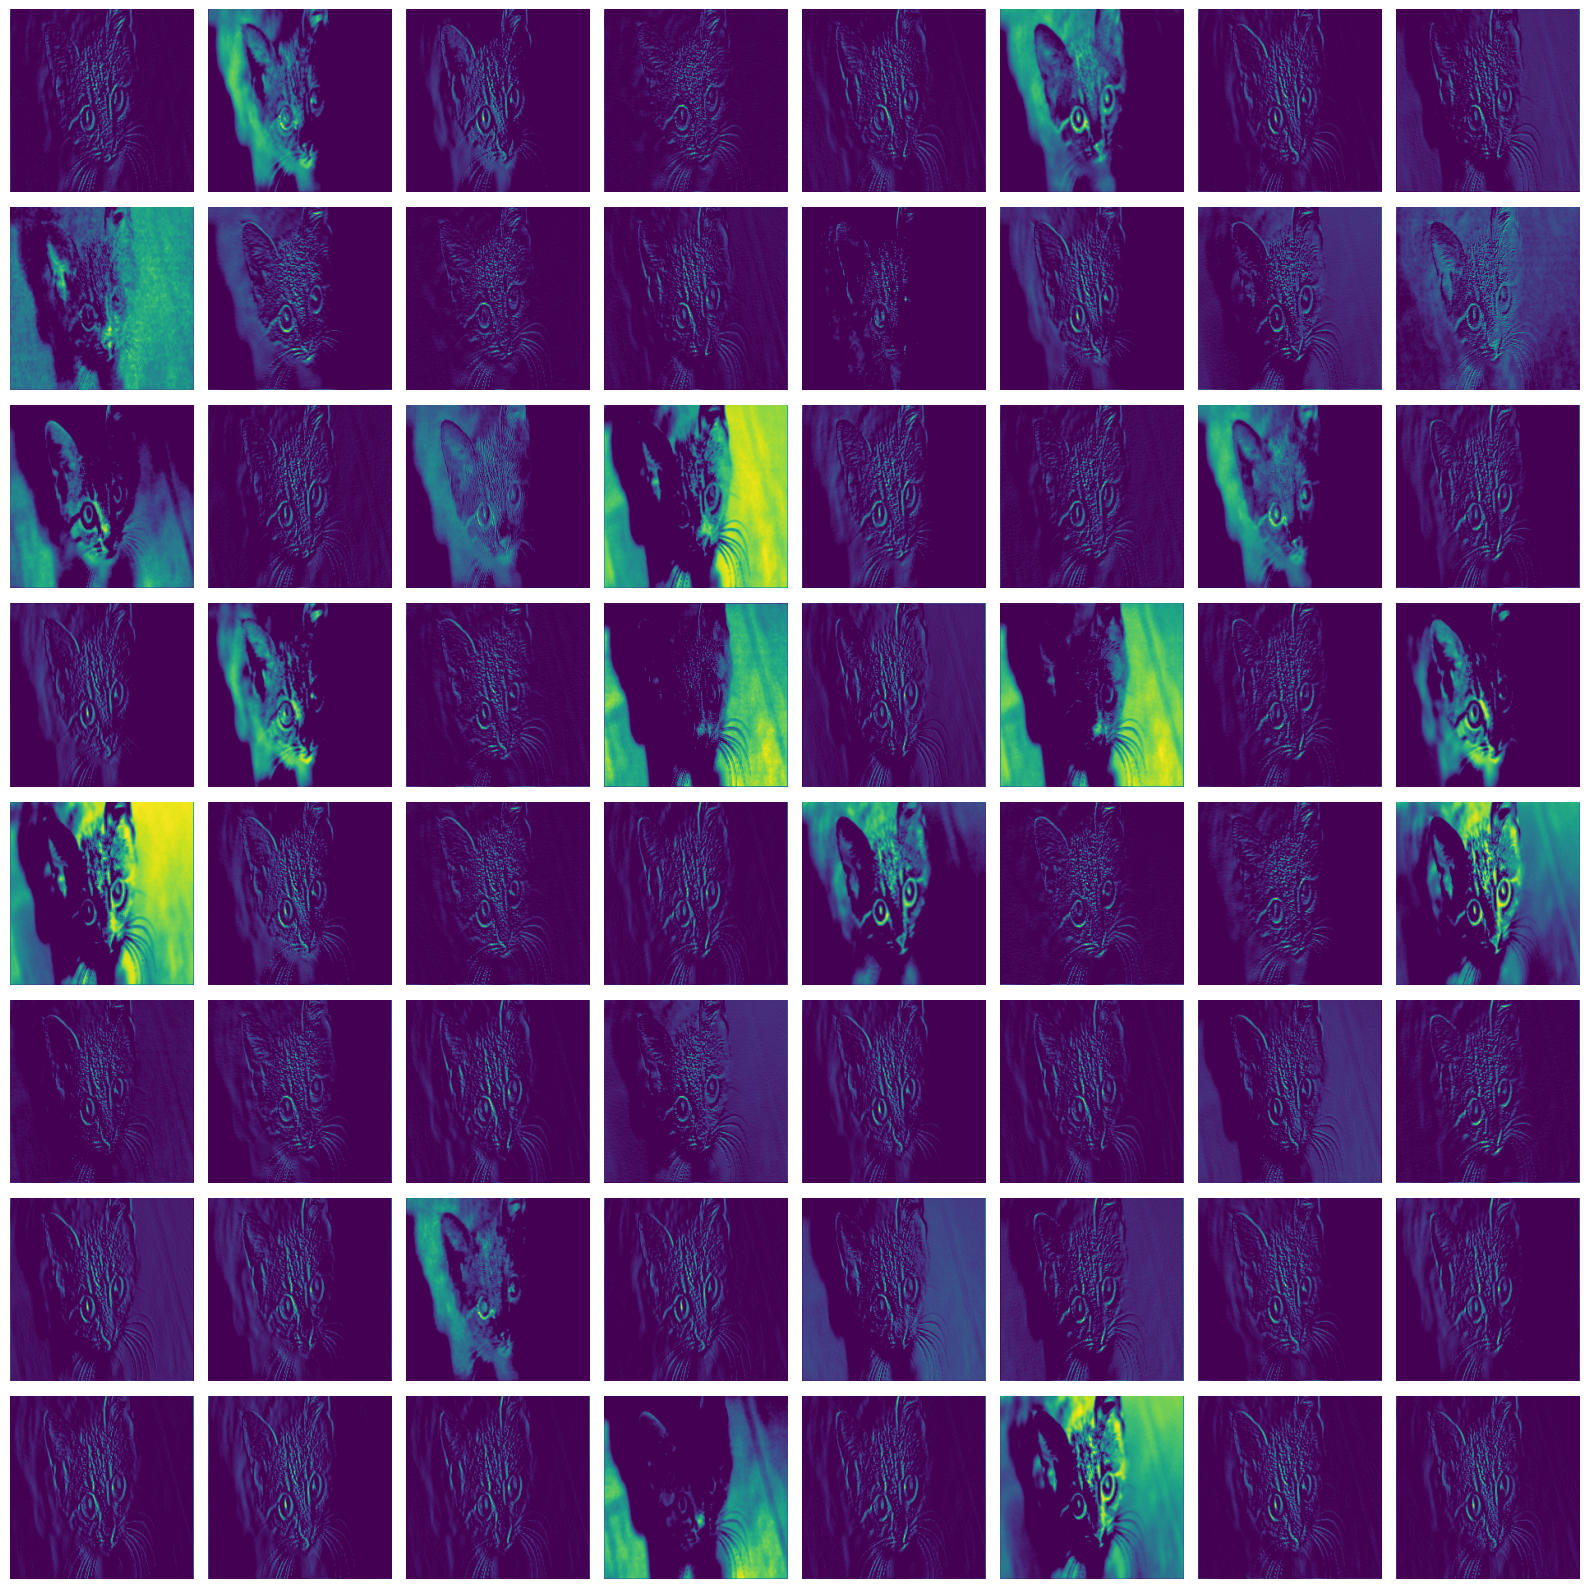

In [14]:
# 두 번째 레이어의 특성 맵 시각화
first_layer_feature_map = feature_maps[1]
num_channels = first_layer_feature_map.shape[-1]  #  channels 수 가져오기

# Create a subplot grid that is approximately square
num_cols = int(np.ceil(np.sqrt(num_channels)))
num_rows = int(np.ceil(num_channels / num_cols))

plt.figure(figsize=(num_cols * 2, num_rows * 2))  # Adjust the figure size appropriately

for i in range(num_channels):
    plt.subplot(num_rows, num_cols, i + 1)  # 시각화
    plt.imshow(first_layer_feature_map[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.tight_layout()
plt.show()